# 2章 教師あり学習
## 2.3 教師あり学習とアルゴリズム
### 2.3.1 サンプルデータセット

In [1]:
from preamble import *

X.shape: (26, 2)


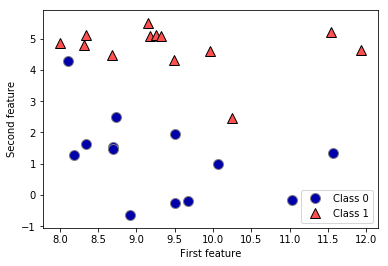

In [5]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)

plt.xlabel("First feature")
plt.ylabel("Second feature")

print('X.shape: {}'.format(X.shape))

Text(0,0.5,'Target')

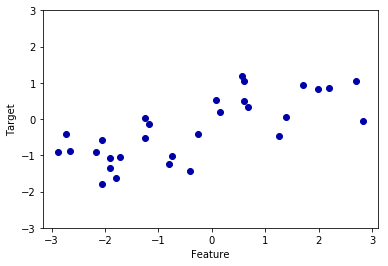

In [12]:
X, y = mglearn.datasets.make_wave(n_samples=30)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

##### 乳癌データセット

In [13]:
from sklearn.datasets import load_breast_cancer

In [15]:
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [16]:
print(cancer.data.shape)

(569, 30)


In [21]:
for n, v in zip(cancer.target_names, np.bincount(cancer.target)):
    print(n, v)

malignant 212
benign 357


##### Reference
- [np.bincount](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.bincount.html)

In [22]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

##### 1970年代のボストン近郊の住宅地の中央値を予測

In [25]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [26]:
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

### 2.3.2 k-最近傍法

### 2.3.3 線形モデル
#### 2.3.3.1 線形回帰モデルによる回帰

In [11]:
from preamble import *

ModuleNotFoundError: No module named 'preamble'

In [17]:
mglearn.plots.plot_linear_regression_wave()

NameError: name 'mglearn' is not defined

#### 2.3.3.2 線形回帰(通常最小二乗法)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
X, y = mglearn.datasets.make_wave(n_samples=50)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [7]:
lr = LinearRegression().fit(X_train, y_train)

In [8]:
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

lr.coef_: [0.426]
lr.intercept_: 0.032497647029336565


訓練セットとテストセットのスコア

In [9]:
print('train score: {}'.format(lr.score(X_train, y_train)))
print('test score: {}'.format(lr.score(X_test, y_test)))

train score: 0.6196251554724519
test score: 0.502664766727509


##### Interpretation
訓練セットとテストセットのスコアが近いため過剰適合ではない

In [23]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print('train score: {}'.format(lr.score(X_train, y_train)))
print('test score: {}'.format(lr.score(X_test, y_test)))

train score: 0.952051960903273
test score: 0.6074721959665863


#### 2.3.3.3 リッジ回帰

In [20]:
from sklearn.linear_model import Ridge

In [24]:
ridge = Ridge().fit(X_train, y_train)
print('train score: {}'.format(ridge.score(X_train, y_train)))
print('test score: {}'.format(ridge.score(X_test, y_test)))

train score: 0.885796658517094
test score: 0.7527683481744755


##### Interpretation
リッジ回帰は制約が強いため, 線形回帰よりもか学習していない

In [26]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('train score: {}'.format(ridge10.score(X_train, y_train)))
print('test score: {}'.format(ridge10.score(X_test, y_test)))

train score: 0.7882787115369614
test score: 0.6359411489177311


In [27]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('train score: {}'.format(ridge01.score(X_train, y_train)))
print('test score: {}'.format(ridge01.score(X_test, y_test)))

train score: 0.9282273685001988
test score: 0.7722067936479806


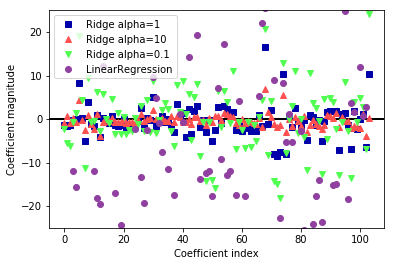

In [28]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

##### Interpretation
・x軸: coef_
・y軸: 特徴量に対応する係数の数値  
・x=0 は最初の特徴, x=1 は2番目の特徴に対する係数  
・alpha=10 は制約が強く0付近  
・alpha=1, 0.1は制約が弱く0から離れている

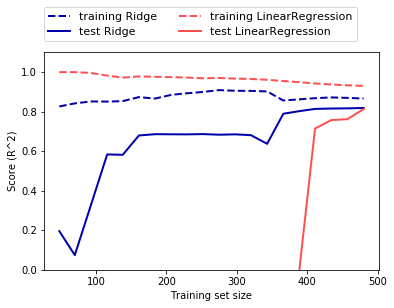

In [29]:
mglearn.plots.plot_ridge_n_samples()

##### Interpretation
・リッジ回帰は正則化が行われているため, 訓練スコアは常に線形回帰よりも低い
 - テストスコアはリッジ回帰のほうが高い  

・線形回帰では訓練スコアが常に低下
・線形回帰はデータサイズが小さいとまったく予測ができていない

#### 2.3.3.4 Lasso

In [38]:
from sklearn.linear_model import Lasso

lasso1 = Lasso().fit(X_train, y_train)
print('train score: {}'.format(lasso1.score(X_train, y_train)))
print('test score: {}'.format(lasso1.score(X_test, y_test)))
print('number of feature: {}'.format(np.sum(lasso1.coef_ != 0)))

train score: 0.29323768991114596
test score: 0.20937503255272272
number of feature: 4


##### Interpretation
特徴が4つしか使われれていない

alphaを小さくして正則化を弱める

In [39]:
lasso2 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('train score: {}'.format(lasso2.score(X_train, y_train)))
print('test score: {}'.format(lasso2.score(X_test, y_test)))
print('number of feature: {}'.format(np.sum(lasso2.coef_ != 0)))

train score: 0.8962226511086497
test score: 0.7656571174549983
number of feature: 33


In [40]:
lasso3 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('train score: {}'.format(lasso3.score(X_train, y_train)))
print('test score: {}'.format(lasso3.score(X_test, y_test)))
print('number of feature: {}'.format(np.sum(lasso3.coef_ != 0)))

train score: 0.9507158754515462
test score: 0.6437467421273558
number of feature: 96


##### Interpretation
正則化を弱めすぎたことで過剰適合

Text(0, 0.5, 'Coefficient magnitude')

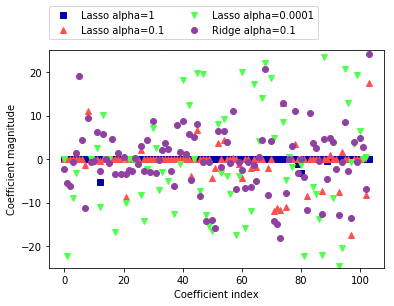

In [42]:
plt.plot(lasso1.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso2.coef_, '^', label="Lasso alpha=0.1")
plt.plot(lasso3.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")